### Try to write as short a code as possible without a pile of cycles. Use numpy and pandas for this

## Import libraries here

In [18]:
%matplotlib inline
%pylab inline
import numpy as np

import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web 

Populating the interactive namespace from numpy and matplotlib


## Define a function to generate stock data

** Function arguments:** 
* start date, datetime
* period, days
* start price, rubles
* stock volatility ( from (0,1) ). Stock price variability over time, float

Try to design your own arguments (**bonus reward**)

**Rules:**
* Use Gaussian distribution for price sampling
* Generated data should be "similar" to real stock data
* A signal about the next price appears every 1 second
* Function also should generate volume for every period


Stock Volatility :  10


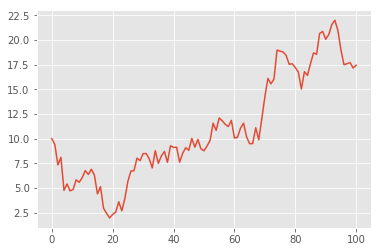

In [19]:
import numpy as np
class myData():
       def price (volatility):
        value = volatility
        value = 10
        ps = [value]
        for i in range(100):
            value += np.random.normal(0.1)
            ps.append(value)
        plt.plot(np.arange(len(ps)), ps) 
        print("Stock Volatility : ", (volatility))
        
myData.price(10) 

Stock Volatility :  10


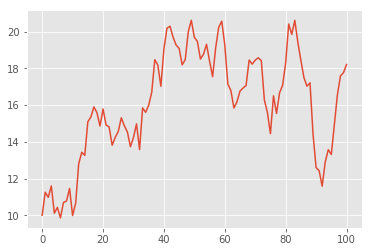

In [20]:
class myData():
       def price (volatility):
        value = volatility
        value = 10
        ps = [value]
        for i in range(100):
            value += np.random.normal(0.1)
            ps.append(value)
        plt.plot(np.arange(len(ps)), ps) 
        print("Stock Volatility : ", (volatility))
        
myData.price(10) 
 

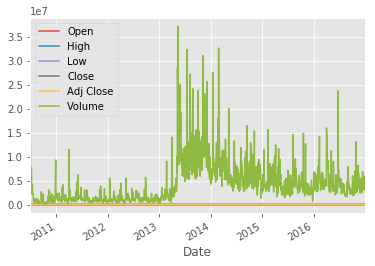

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [25]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader('TSLA' , 'yahoo' , start , end)
style.use('ggplot')


df.plot()
plt.show()

df.head()

In [27]:
from matplotlib.finance import candlestick_ohlc   
import matplotlib.dates as mdates                   

In [28]:
rsac = df['Adj Close'].resample('10H').ohlc()      
rsac.reset_index(inplace=True)                      
print(rsac.head())

                 Date       open       high        low      close
0 2010-06-29 00:00:00  23.889999  23.889999  23.889999  23.889999
1 2010-06-29 10:00:00        NaN        NaN        NaN        NaN
2 2010-06-29 20:00:00  23.830000  23.830000  23.830000  23.830000
3 2010-06-30 06:00:00        NaN        NaN        NaN        NaN
4 2010-06-30 16:00:00  21.959999  21.959999  21.959999  21.959999


In [ ]:
#df2 = df.resample(rule='15Min', on='datetime').mean()
#df2 = df2.set_index('datetime', drop=False)
#df2.between_time('9:00','16:30')

## Define plot functions 

**Rules:**
* All plot functions input arguments include generated data!
* Print labels, title, legend
* Change figure size
* Create the most effective view of final plot

### Simple plot

**Arguments:**
* from, datetime
* to, datetime
* simple moving average, bool (https://en.wikipedia.org/wiki/Moving_average). 
    If True - plot SMA on the same figure

Example in "./sp.png"

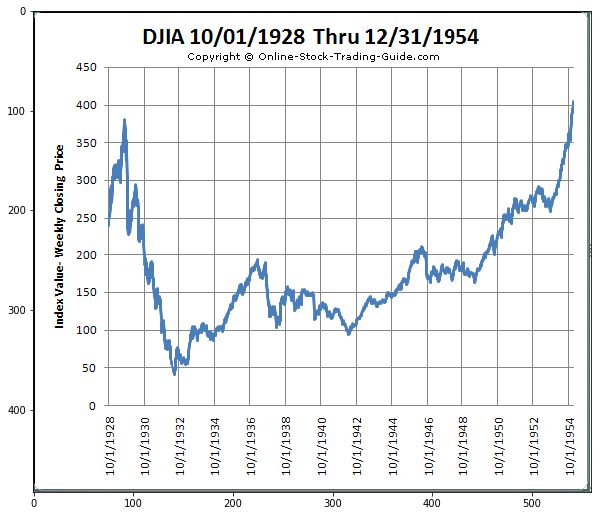

In [10]:
##Some example
plt.figure(figsize=(10,10))
plt.imshow(mimg.imread("./sp.png"))

Populating the interactive namespace from numpy and matplotlib


<Container object of 1640 artists>

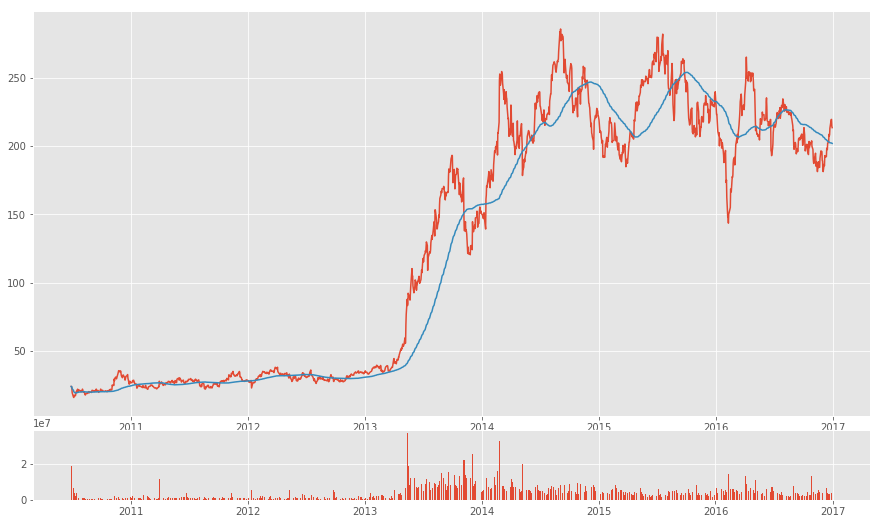

In [30]:
%pylab inline
df['100ma']=df['Adj Close'].rolling(window=100 , min_periods=0).mean()  # Moving Average
pylab.rcParams['figure.figsize'] = (15, 9)
ax1 = plt.subplot2grid((6,1),(0,0) , rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0) , rowspan=1, colspan=1)

ax1.plot(df.index , df['Adj Close'])
ax1.plot(df.index , df['100ma'])
ax2.bar(df.index , df['Volume'])

Populating the interactive namespace from numpy and matplotlib


<Container object of 1640 artists>

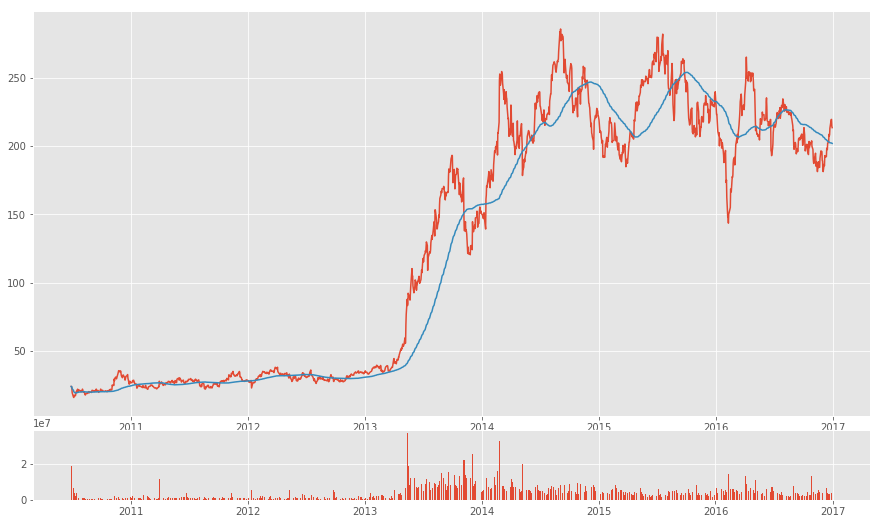

In [31]:
%pylab inline
df['100ma']=df['Adj Close'].rolling(window=100 , min_periods=0).mean()  # Moving Average
pylab.rcParams['figure.figsize'] = (15, 9)
ax1 = plt.subplot2grid((6,1),(0,0) , rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0) , rowspan=1, colspan=1)

ax1.plot(df.index , df['Adj Close'])
ax1.plot(df.index , df['100ma'])
ax2.bar(df.index , df['Volume'])

Populating the interactive namespace from numpy and matplotlib
                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


<function matplotlib.pyplot.show>

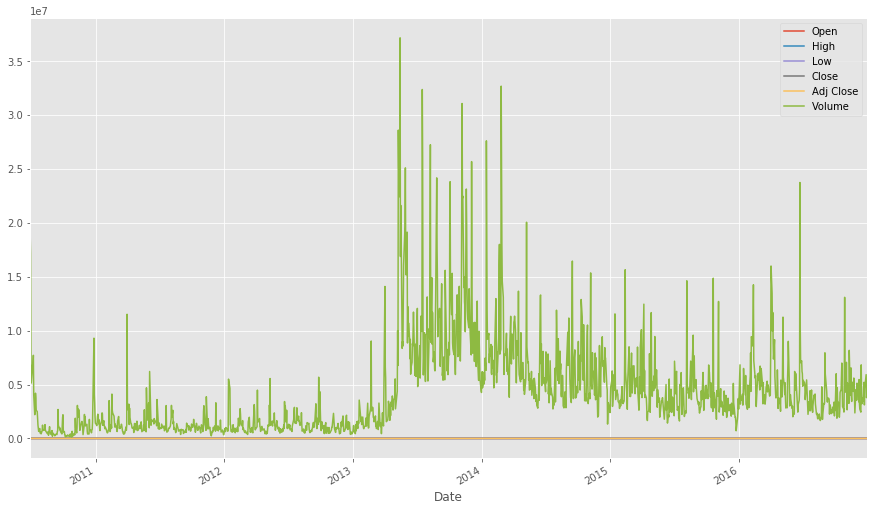

In [32]:
%pylab inline
print(df[['Open','High' , 'Low','Close', 'Adj Close','Volume']].head())
pylab.rcParams['figure.figsize'] = (15, 9)
df[['Open','High' , 'Low','Close', 'Adj Close','Volume']].plot()
plt.show

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

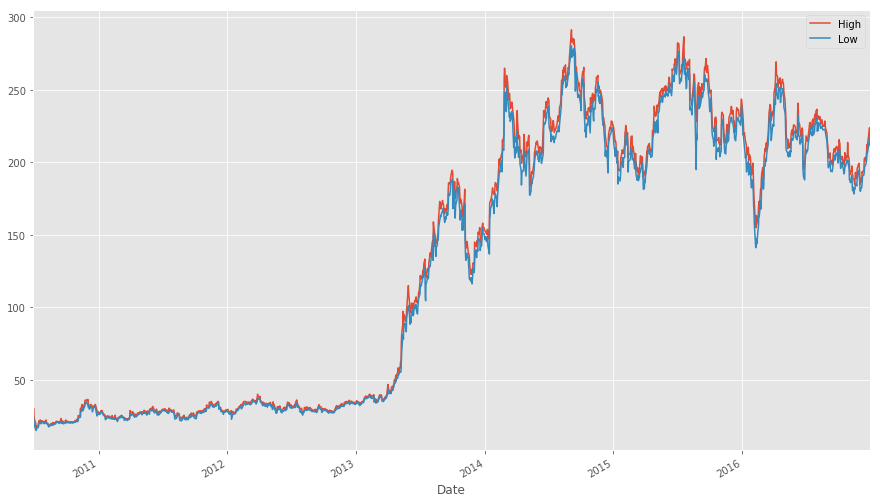

In [33]:
import matplotlib.pyplot as plt  
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)
df[['High' , 'Low']].plot(grid = True)
plt.show

### Candle plot

It's a standart candle stock plot

**Arguments:**
* from, datetime
* to, datetime

**Rules:**
* Use 1 hour as time period for 1 candle (as in example)

Example in 'cp.jpg'. All title and labels are example. Use your own.

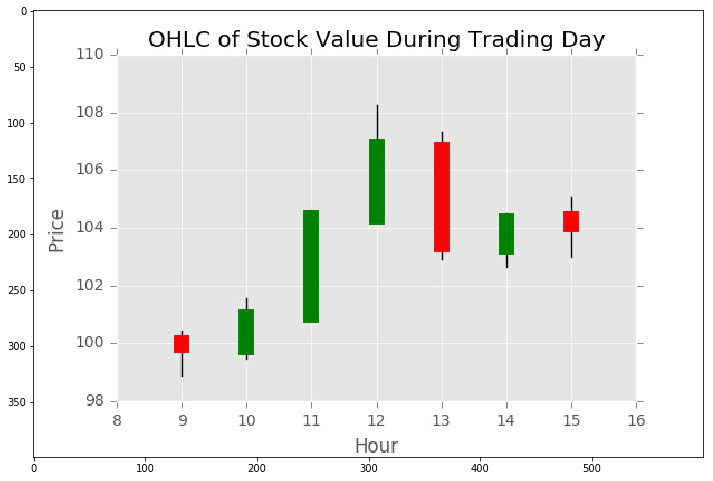

In [20]:
##Some example
plt.figure(figsize=(12,12))
plt.imshow(mimg.imread("./cp.jpg"))

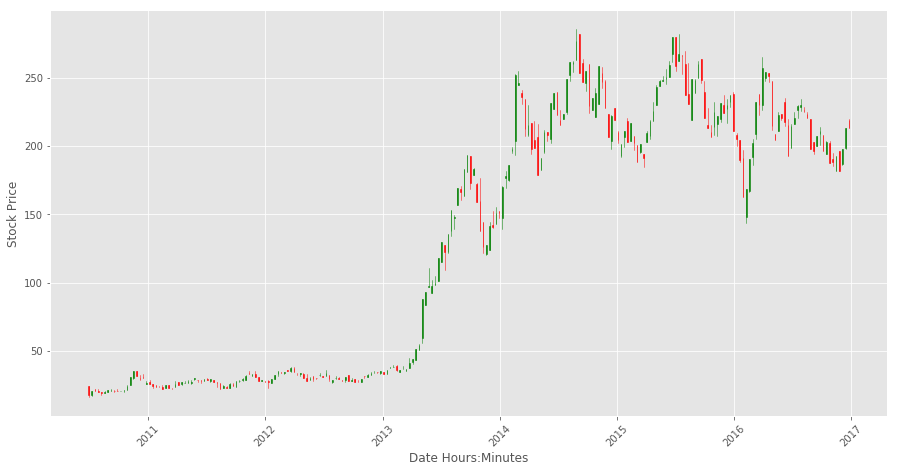

In [34]:
a = df['Adj Close'].resample('10D').ohlc()                    
a.reset_index(inplace=True)                                               
a ['Date'] = a ['Date'].map(mdates.date2num)                  

b = df['Volume'].resample('10D').sum()                        

ax1 = plt.subplot2grid((6,1),(0,0) , rowspan=5, colspan=1)       

ax1.xaxis_date()                                             
candlestick_ohlc(ax1 , a.values, width=2 , colorup='g')                             

plt.xticks(rotation=45)
plt.ylabel('Stock Price')
plt.xlabel('Date Hours:Minutes')
plt.show()

In [ ]:
df = df[['Open','High' , 'Low','Close', 'Adj Close','Volume']]
df["Date"] = df["Date"].apply(mdates.date2num)

f1 = plt.subplot2grid((6, 4), (1, 0), rowspan=6, colspan=4, axisbg='#07000d')
candlestick_ohlc(f1, df.values, width=.6, colorup='#53c156', colordown='#ff1717')

f1.xaxis_date()
f1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S'))

plt.xticks(rotation=45)
plt.ylabel('Stock Price')
plt.xlabel('Date Hours:Minutes')
plt.show()


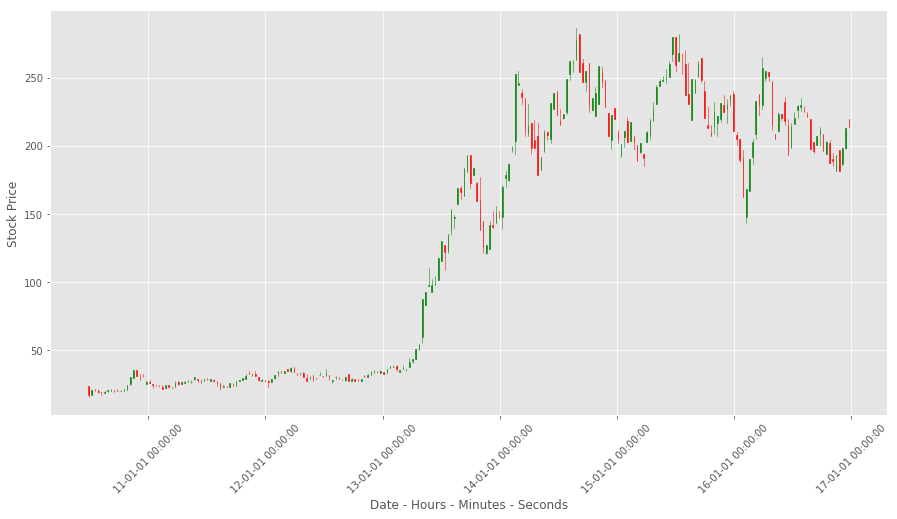

In [71]:
a = df['Adj Close'].resample('10D').ohlc()                    
a.reset_index(inplace=True)                                               
a ['Date'] = a ['Date'].map(mdates.date2num)                  

b = df['Volume'].resample('10D').sum()                        

ax1 = plt.subplot2grid((6,1),(0,0) , rowspan=5, colspan=1)       
candlestick_ohlc(ax1 , a.values, width=2 , colorup='g')

ax1.xaxis_date()                                             
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S'))                             

plt.xticks(rotation=45)
plt.ylabel('Stock Price')
plt.xlabel('Date - Hours - Minutes - Seconds')
plt.show()